<a href="https://colab.research.google.com/github/iship-itb14/Data_Mining_Group-6/blob/main/Data_Mining_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np  # for missing value handling
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
%matplotlib inline

df = pd.read_csv("spotify_2015_2025_85k.csv")
print(df.shape)
print(df.columns)
print(df.dtypes)
df.head()


(64744, 19)
Index(['track_id', 'track_name', 'artist_name', 'album_name', 'release_date',
       'genre', 'duration_ms', 'popularity', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'instrumentalness', 'tempo', 'stream_count',
       'country', 'explicit', 'label'],
      dtype='object')
track_id             object
track_name           object
artist_name          object
album_name           object
release_date         object
genre                object
duration_ms         float64
popularity          float64
danceability        float64
energy              float64
key                 float64
loudness            float64
mode                float64
instrumentalness    float64
tempo               float64
stream_count        float64
country              object
explicit            float64
label                object
dtype: object


,track_id,track_name,artist_name,album_name,release_date,genre,duration_ms,popularity,danceability,energy,key,loudness,mode,instrumentalness,tempo,stream_count,country,explicit,label
0,TRK-BEBD53DA84E1,Agent every (0),Noah Rhodes,Beautiful instead,2016-04-01,Pop,234194.0,55.0,0.15,0.74,9.0,-32.22,0.0,0.436,73.12,13000.0,Brazil,0.0,Universal Music
1,TRK-6A32496762D7,Night respond,Jennifer Cole,Table,2022-04-15,Metal,375706.0,45.0,0.44,0.46,0.0,-14.02,0.0,0.223,157.74,1000.0,France,1.0,Island Records
2,TRK-47AA7523463E,Future choice whatever,Brandon Davis,Page southern,2016-02-23,Rock,289191.0,55.0,0.62,0.80,8.0,-48.26,1.0,0.584,71.03,1000.0,Germany,1.0,XL Recordings
3,TRK-25ADA22E3B06,Bad fall pick those,Corey Jones,Spring,2015-10-12,Pop,209484.0,51.0,0.78,0.98,1.0,-34.47,1.0,0.684,149.00,1000.0,France,0.0,Warner Music
4,TRK-9245F2AD996A,Husband,Mark Diaz,Great prove,2022-07-08,Indie,127435.0,39.0,0.74,0.18,10.0,-17.84,0.0,0.304,155.85,2000.0,United States,0.0,Independent


In [2]:
# TYPE CORRECTIONS
# Convert release_date to datetime
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

# Numeric-but-categorical
df['explicit'] = df['explicit'].astype('category')
df['mode'] = df['mode'].astype('category')
df['key'] = df['key'].astype('category')


In [3]:
#DATA QUALITY CHECKS
print("Missing values per column:")
print(df.isna().sum())

print("\nDuplicate rows:", df.duplicated().sum())
print("\nColumns with single value:")
print([col for col in df.columns if df[col].nunique() == 1])

Missing values per column:
track_id             0
track_name          15
artist_name          1
album_name          36
release_date         1
genre                1
duration_ms          1
popularity           1
danceability         1
energy               1
key                  1
loudness             1
mode                 1
instrumentalness     1
tempo                1
stream_count         1
country              1
explicit             1
label                1
dtype: int64

Duplicate rows: 0

Columns with single value:
[]


In [4]:
#DESCRIPTIVE STATISTICS

#Numeric
numeric_cols = ['popularity', 'duration_ms', 'danceability', 'energy',
                'loudness', 'instrumentalness', 'tempo', 'stream_count']

numeric_summary = df[numeric_cols].describe().T
numeric_summary['IQR'] = numeric_summary['75%'] - numeric_summary['25%']

# Outlier flag using 1.5*IQR
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]
    numeric_summary.loc[col, 'Outlier Count'] = outliers.shape[0]

print("\nNumeric Summary with Outlier Counts:")
print(numeric_summary)

#Categorical
categorical_cols = ['genre', 'explicit', 'country', 'label']

for col in categorical_cols:
    freq = df[col].value_counts(dropna=False)
    pct = df[col].value_counts(normalize=True, dropna=False)*100
    cat_summary = pd.DataFrame({'Frequency': freq, 'Percentage': pct})
    print(f"\nCategorical Summary for {col}:")
    print(cat_summary.head(10))


Numeric Summary with Outlier Counts:
                    count           mean           std       min         25%  \
popularity        64743.0      48.133234  1.482848e+01      2.00      38.000   
duration_ms       64743.0  255013.001406  9.527211e+04  90005.00  171894.500   
danceability      64743.0       0.519422  2.706935e-01      0.05       0.290   
energy            64743.0       0.505313  2.800545e-01      0.02       0.260   
loudness          64743.0     -28.000441  1.558062e+01    -55.00     -41.450   
instrumentalness  64743.0       0.399510  2.315813e-01      0.00       0.197   
tempo             64743.0     130.024644  4.038746e+01     60.00      95.090   
stream_count      64743.0  213648.672443  1.678464e+06   1000.00    1000.000   

                         50%        75%          max         IQR  \
popularity            47.000      57.00       100.00      19.000   
duration_ms       255051.000  337338.50    420000.00  165444.000   
danceability           0.520       0.

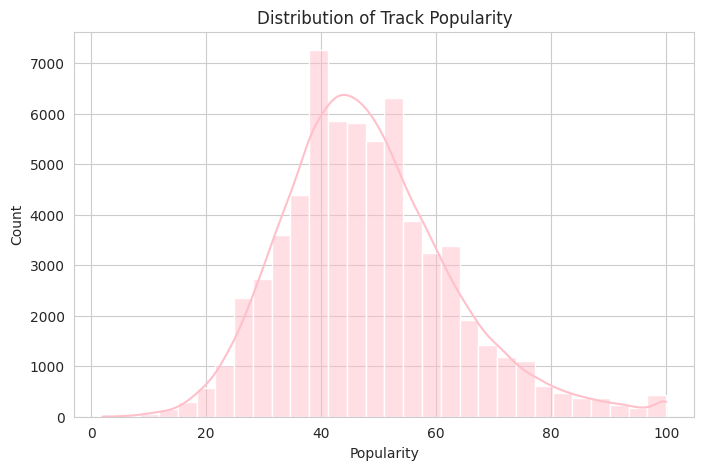

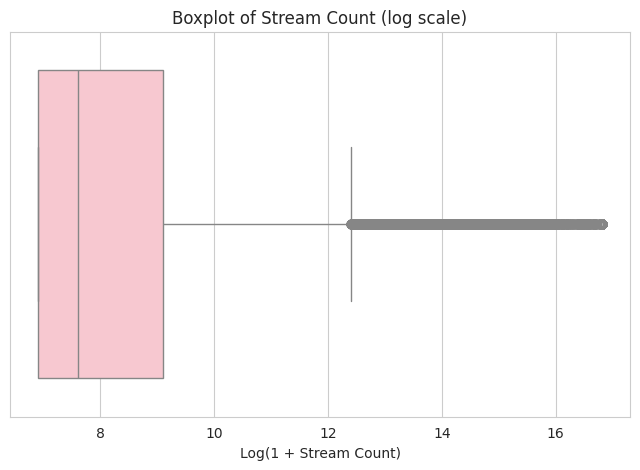

/tmp/ipython-input-4124677357.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette='pink')


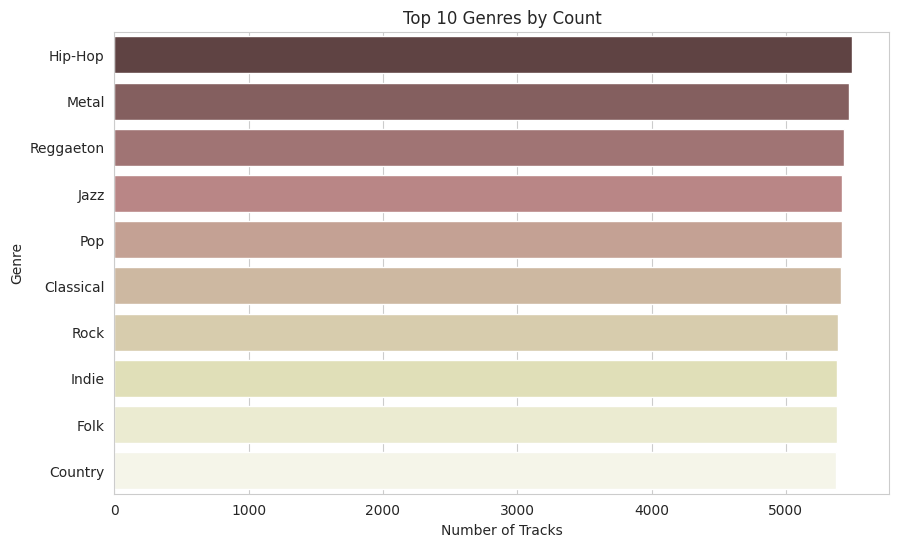

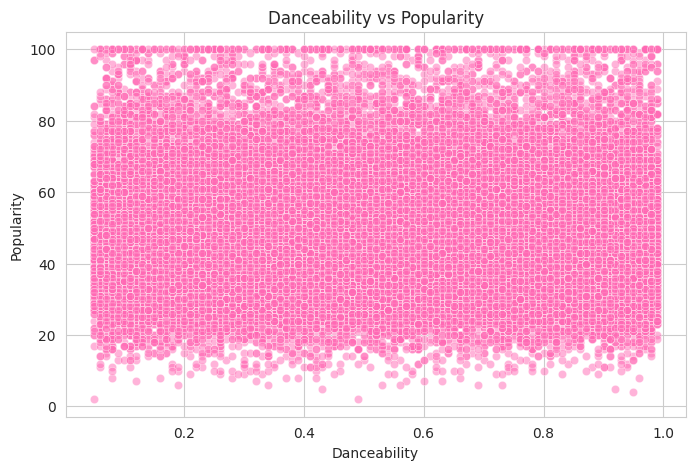

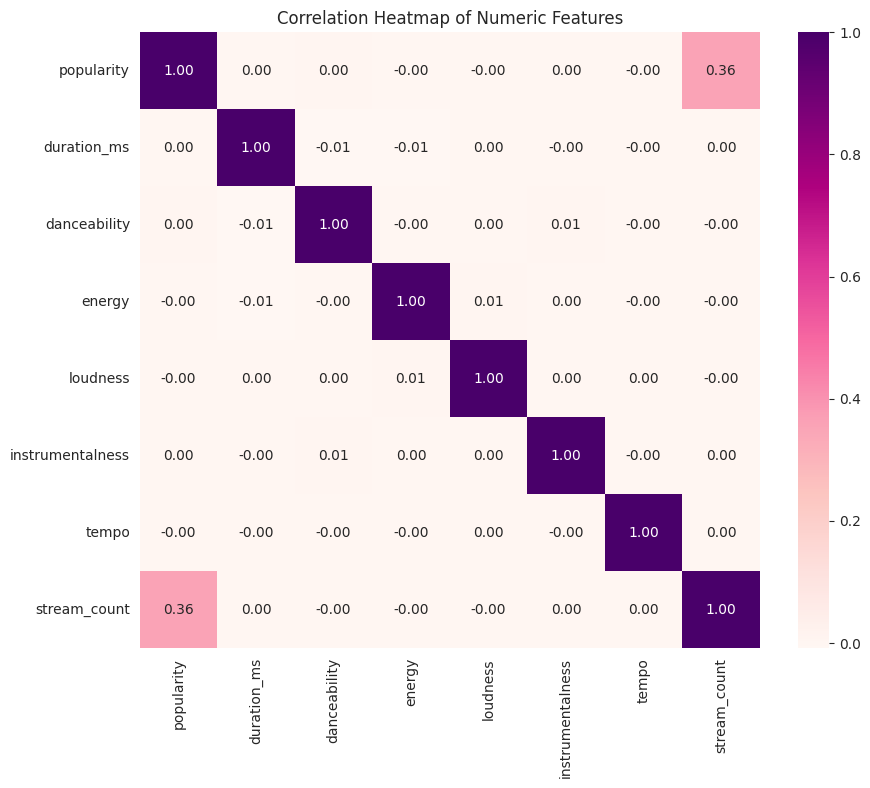

In [5]:
#VISUALIZATIONS

# 1. Histogram - Popularity
plt.figure(figsize=(8,5))
sns.histplot(df['popularity'], bins=30, kde=True, color='pink')
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.show()

# 2. Boxplot - Stream Count (log scale)
plt.figure(figsize=(8,5))
sns.boxplot(x=np.log1p(df['stream_count']), color='pink')
plt.title('Boxplot of Stream Count (log scale)')
plt.xlabel('Log(1 + Stream Count)')
plt.show()

# 3. Bar chart - Top 10 Genres
top_genres = df['genre'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='pink')
plt.title('Top 10 Genres by Count')
plt.xlabel('Number of Tracks')
plt.ylabel('Genre')
plt.show()

# 4. Scatter - Danceability vs Popularity
plt.figure(figsize=(8,5))
sns.scatterplot(x='danceability', y='popularity', data=df, color='hotpink', alpha=0.5)
plt.title('Danceability vs Popularity')
plt.xlabel('Danceability')
plt.ylabel('Popularity')
plt.show()

# 5. Correlation Heatmap
plt.figure(figsize=(10,8))
num_df = df[numeric_cols]
corr = num_df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='RdPu')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

In [6]:
#INSIGHTS TEMPLATE (AUTOMATED)
insights = []

# Example: Top genres
top_genre = df['genre'].value_counts().idxmax()
top_genre_pct = df['genre'].value_counts(normalize=True).max()*100
insights.append(f"The most common genre is {top_genre} ({top_genre_pct:.2f}% of tracks).")

# Example: Explicit tracks
explicit_pct = (df['explicit'] == 1).mean()*100
insights.append(f"{explicit_pct:.2f}% of tracks are explicit.")

# Example: Popularity outliers
pop_Q1 = df['popularity'].quantile(0.25)
pop_Q3 = df['popularity'].quantile(0.75)
pop_IQR = pop_Q3 - pop_Q1
pop_outliers = df[(df['popularity'] < pop_Q1 - 1.5*pop_IQR) | (df['popularity'] > pop_Q3 + 1.5*pop_IQR)].shape[0]
insights.append(f"There are {pop_outliers} tracks considered outliers in popularity.")

# Example: Correlation
dance_pop_corr = df[['danceability','popularity']].corr().iloc[0,1]
insights.append(f"Danceability correlates with popularity (r = {dance_pop_corr:.2f}).")

# Display insights
print("\nAutomated Insights:")
for i, insight in enumerate(insights, 1):
    print(f"{i}. {insight}")


Automated Insights:
1. The most common genre is Hip-Hop (8.49% of tracks).
2. 20.19% of tracks are explicit.
3. There are 1371 tracks considered outliers in popularity.
4. Danceability correlates with popularity (r = 0.00).


In [7]:
#LIMITATIONS/BIAS
limitations = [
    "Popularity and streams reflect Spotify platform users, not global music listeners.",
    "Country distribution is uneven; some regions are underrepresented.",
    "Missing values in release_date may bias temporal analysis."
]

print("\nLimitations / Bias Notes:")
for l in limitations:
    print(f"- {l}")


Limitations / Bias Notes:
- Popularity and streams reflect Spotify platform users, not global music listeners.
- Country distribution is uneven; some regions are underrepresented.
- Missing values in release_date may bias temporal analysis.
